In [312]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [313]:
dataset = MNIST(root='data/',download= True)

In [314]:
len(dataset)

60000

In [315]:
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [316]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


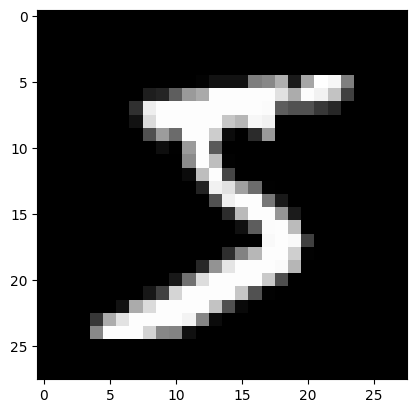

In [317]:
image, label = dataset[0]
plt.imshow(image,cmap='gray')
print('Label:',label)

Label: 3


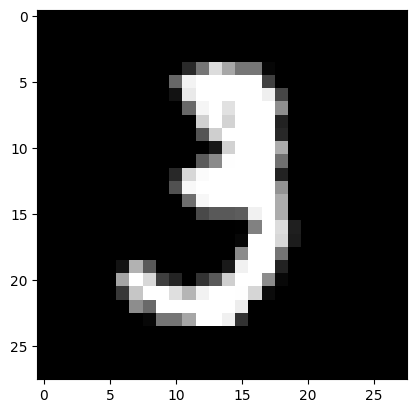

In [318]:
image, label = dataset[10]
plt.imshow(image,cmap='gray')
print('Label:',label)

In [319]:
import torchvision.transforms as transforms

In [320]:
dataset = MNIST(root='data/',train = True,transform=transforms.ToTensor())

In [321]:
img_tensor, label = dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [322]:
print(img_tensor[0,10:15,10:15])

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])


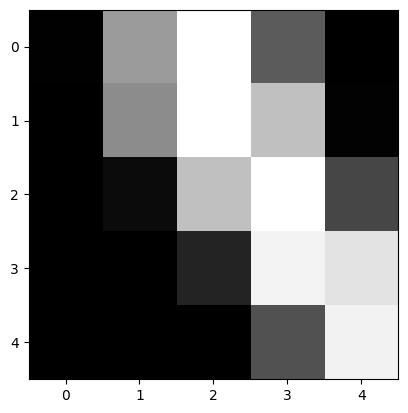

In [323]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

# Training and Validation Datasets

In [324]:
from torch.utils.data import random_split

train_ds,val_ds = random_split(dataset,[50000,10000])
len(train_ds),len(val_ds)

(50000, 10000)

In [325]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds,batch_size,shuffle=True)
val_loader = DataLoader(val_ds,batch_size)

# Model


In [326]:
import torch.nn as nn

input_size = 28 * 28
num_classes = 10

# logist regression model

model = nn.Linear(input_size,num_classes)

In [327]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0148,  0.0133, -0.0115,  ..., -0.0007,  0.0097,  0.0052],
        [-0.0077, -0.0176,  0.0281,  ..., -0.0243, -0.0059,  0.0223],
        [ 0.0103, -0.0035, -0.0176,  ..., -0.0342,  0.0240, -0.0143],
        ...,
        [-0.0316, -0.0152, -0.0106,  ...,  0.0238,  0.0156, -0.0318],
        [-0.0090, -0.0103,  0.0262,  ..., -0.0151, -0.0156,  0.0110],
        [-0.0117, -0.0187, -0.0005,  ...,  0.0282,  0.0128,  0.0203]],
       requires_grad=True)

In [328]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0140, -0.0295,  0.0256,  0.0234, -0.0169,  0.0211,  0.0107, -0.0346,
        -0.0030, -0.0146], requires_grad=True)

In [329]:
# for images, label in train_loader:
#     print(label)
#     print(images.shape)
#     outputs = model(images)
#     print(outputs)
#     break
    

In [330]:
images.shape

torch.Size([128, 1, 28, 28])

In [331]:
images.reshape(128,784).shape

torch.Size([128, 784])

In [332]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)

    def forward(self,xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out

model = MnistModel()    

In [333]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [334]:
print(model.linear.weight.shape,model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0198, -0.0209,  0.0230,  ...,  0.0311,  0.0128, -0.0334],
         [-0.0311, -0.0065, -0.0345,  ...,  0.0309,  0.0238, -0.0118],
         [-0.0320, -0.0258, -0.0132,  ...,  0.0290,  0.0300, -0.0222],
         ...,
         [ 0.0312,  0.0333,  0.0033,  ...,  0.0107,  0.0056,  0.0261],
         [-0.0286, -0.0194,  0.0217,  ...,  0.0345,  0.0296, -0.0130],
         [ 0.0070, -0.0258, -0.0142,  ...,  0.0244,  0.0250,  0.0357]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0167, -0.0137,  0.0064,  0.0250,  0.0352,  0.0329, -0.0344,  0.0110,
         -0.0222,  0.0289], requires_grad=True)]

In [335]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('output.shape',outputs.shape)
print('sample outputs:\n',outputs[:2].data)

torch.Size([128, 1, 28, 28])
output.shape torch.Size([128, 10])
sample outputs:
 tensor([[ 0.1594, -0.1810, -0.0227,  0.2203,  0.2853,  0.0325,  0.0484, -0.4057,
         -0.1532,  0.3611],
        [ 0.0011, -0.1282, -0.3514,  0.0243, -0.1011, -0.2907, -0.3082, -0.2532,
         -0.1789,  0.1124]])


In [336]:
import torch.nn.functional as F

In [337]:
probs = F.softmax(outputs,dim = 1)

print('Sample probabilities:\n',probs[:2].data)

print('Sum: ', torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1106, 0.0787, 0.0922, 0.1176, 0.1254, 0.0974, 0.0990, 0.0629, 0.0809,
         0.1353],
        [0.1147, 0.1008, 0.0806, 0.1174, 0.1036, 0.0857, 0.0842, 0.0890, 0.0958,
         0.1282]])
Sum:  1.0


In [338]:
max_probs, preds = torch.max(probs,dim=1)
print(preds)
print(max_probs)

tensor([9, 9, 1, 9, 1, 1, 9, 9, 0, 9, 4, 4, 0, 9, 4, 3, 3, 0, 1, 3, 7, 0, 3, 0,
        3, 9, 1, 1, 0, 3, 3, 3, 0, 9, 3, 0, 4, 4, 9, 0, 1, 1, 9, 0, 4, 3, 0, 9,
        9, 9, 0, 3, 3, 9, 3, 1, 9, 1, 3, 9, 4, 3, 3, 1, 3, 4, 5, 0, 4, 3, 5, 5,
        0, 3, 3, 0, 3, 3, 3, 9, 3, 9, 4, 3, 4, 5, 4, 9, 3, 3, 1, 5, 9, 3, 1, 1,
        3, 1, 0, 0, 3, 1, 0, 3, 4, 9, 0, 9, 1, 4, 0, 1, 1, 0, 9, 3, 3, 9, 9, 1,
        7, 0, 9, 5, 9, 0, 0, 4])
tensor([0.1353, 0.1282, 0.1349, 0.1234, 0.1287, 0.1392, 0.1297, 0.1233, 0.1213,
        0.1352, 0.1320, 0.1364, 0.1225, 0.1448, 0.1177, 0.1643, 0.1410, 0.1376,
        0.1462, 0.1525, 0.1311, 0.1580, 0.1329, 0.1385, 0.1294, 0.1326, 0.1401,
        0.1318, 0.1368, 0.1358, 0.1239, 0.1399, 0.1440, 0.1235, 0.1369, 0.1395,
        0.1713, 0.1208, 0.1366, 0.1321, 0.1348, 0.1456, 0.1494, 0.1506, 0.1425,
        0.1263, 0.1233, 0.1305, 0.1538, 0.1382, 0.1307, 0.1337, 0.1610, 0.1262,
        0.1205, 0.1147, 0.1433, 0.1315, 0.1274, 0.1432, 0.1289, 0.1165, 0.1266,
       

In [339]:
labels

tensor([0, 9, 5, 9, 3, 5, 8, 1, 8, 0, 1, 6, 7, 3, 1, 5, 6, 9, 6, 6, 7, 8, 3, 7,
        0, 0, 0, 5, 2, 8, 3, 8, 9, 3, 0, 8, 2, 0, 9, 7, 8, 3, 5, 4, 6, 1, 2, 9,
        0, 5, 4, 8, 6, 1, 1, 1, 1, 5, 3, 3, 4, 3, 0, 3, 7, 6, 5, 4, 9, 2, 6, 0,
        9, 8, 1, 4, 0, 8, 8, 9, 7, 1, 1, 2, 1, 9, 0, 6, 2, 6, 0, 7, 8, 6, 4, 3,
        5, 6, 0, 4, 3, 5, 4, 1, 1, 9, 4, 0, 5, 6, 7, 5, 6, 6, 4, 1, 2, 6, 7, 4,
        7, 6, 9, 3, 7, 4, 4, 1])

# Evaluation Metric

In [340]:
def accuracy(outputs,labels):
    _, pred = torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(pred == labels).item()/len(preds))

In [341]:
accuracy(outputs,labels)

tensor(0.1406)

In [342]:
probs

tensor([[0.1106, 0.0787, 0.0922,  ..., 0.0629, 0.0809, 0.1353],
        [0.1147, 0.1008, 0.0806,  ..., 0.0890, 0.0958, 0.1282],
        [0.1232, 0.1349, 0.0651,  ..., 0.0737, 0.0818, 0.1050],
        ...,
        [0.1514, 0.0906, 0.0869,  ..., 0.1102, 0.0706, 0.1105],
        [0.1260, 0.1226, 0.0935,  ..., 0.0916, 0.0807, 0.1105],
        [0.0920, 0.0995, 0.0834,  ..., 0.0985, 0.0947, 0.1101]],
       grad_fn=<SoftmaxBackward>)

In [343]:
outputs

tensor([[ 0.1594, -0.1810, -0.0227,  ..., -0.4057, -0.1532,  0.3611],
        [ 0.0011, -0.1282, -0.3514,  ..., -0.2532, -0.1789,  0.1124],
        [ 0.1441,  0.2351, -0.4935,  ..., -0.3693, -0.2652, -0.0156],
        ...,
        [ 0.3952, -0.1179, -0.1596,  ...,  0.0777, -0.3681,  0.0802],
        [ 0.1582,  0.1308, -0.1405,  ..., -0.1605, -0.2872,  0.0264],
        [-0.1729, -0.0949, -0.2717,  ..., -0.1049, -0.1444,  0.0066]],
       grad_fn=<AddmmBackward>)

In [344]:
loss_fn = F.cross_entropy

In [345]:
loss = loss_fn(outputs,labels)
print(loss)

tensor(2.3047, grad_fn=<NllLossBackward>)


# Training the model

In [346]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [347]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)
    
    def forward(self,xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out
    
    def training_step(self,batch):
        images,labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        return loss
    
    def validation_step(self,batch):
        images,labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        acc = accuracy(out,labels)
        return {'val_loss': loss,'val_acc':acc}
    
    def validation_epoch_end(self,outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc']for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}
    
    def epoch_end(self,epoch,result):
        print('Epoch[{}],val_loss {:.4f},val_acc:{:.4f}'.format(epoch,result['val_loss'],result['val_acc']))

model = MnistModel()

In [348]:
def fit (epochs,lr,model,train_loader,val_loader,opt_func = torch.optim.SGD):
    optimizer = opt_func(model.parameters(),lr)
    history = []

    for epoch in range(epochs):

        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        result = evaluate(model,val_loader)
        model.epoch_end(epoch,result)
        history.append(result)
    
    return history

In [349]:
result = evaluate(model,val_loader)
result

{'val_loss': 2.341048240661621, 'val_acc': 0.15565665066242218}

In [350]:
history1 = fit(5,0.001,model,train_loader,val_loader)

Epoch [0], val_loss: 1.9654, val_acc: 0.5823
Epoch [1], val_loss: 1.6932, val_acc: 0.7120
Epoch [2], val_loss: 1.4898, val_acc: 0.7468
Epoch [3], val_loss: 1.3360, val_acc: 0.7717
Epoch [4], val_loss: 1.2176, val_acc: 0.7847


In [351]:
history2 = fit(5,0.001,model,train_loader,val_loader)

Epoch [0], val_loss: 1.1247, val_acc: 0.7939
Epoch [1], val_loss: 1.0501, val_acc: 0.8026
Epoch [2], val_loss: 0.9892, val_acc: 0.8084
Epoch [3], val_loss: 0.9384, val_acc: 0.8127
Epoch [4], val_loss: 0.8957, val_acc: 0.8171


In [352]:
history3 = fit(5,0.001,model,train_loader,val_loader)

Epoch [0], val_loss: 0.8590, val_acc: 0.8213
Epoch [1], val_loss: 0.8272, val_acc: 0.8235
Epoch [2], val_loss: 0.7995, val_acc: 0.8253
Epoch [3], val_loss: 0.7750, val_acc: 0.8260
Epoch [4], val_loss: 0.7532, val_acc: 0.8293


In [353]:
history4 = fit(5,0.001,model,train_loader,val_loader)

Epoch [0], val_loss: 0.7336, val_acc: 0.8315
Epoch [1], val_loss: 0.7160, val_acc: 0.8338
Epoch [2], val_loss: 0.7001, val_acc: 0.8360
Epoch [3], val_loss: 0.6855, val_acc: 0.8378
Epoch [4], val_loss: 0.6722, val_acc: 0.8390


Text(0.5, 1.0, 'Accuracy vs N° of epochs')

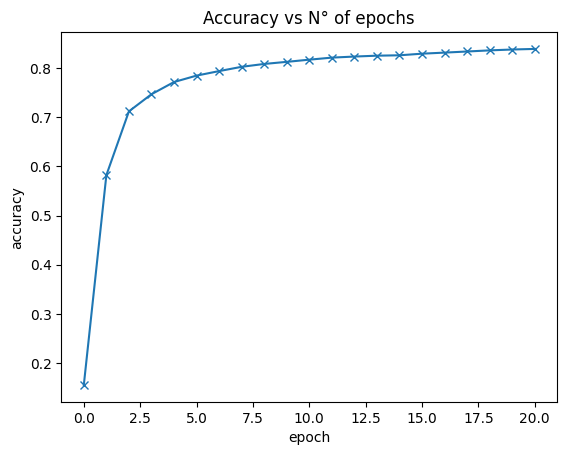

In [354]:
history = [result] + history1 + history2 + history3+ history4
accuracies = [results['val_acc'] for results in history]
plt.plot(accuracies,'-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs N° of epochs')



# Testing in images

In [355]:
test_dataset = MNIST(root ='data/',train = False,transform=transforms.ToTensor())

shape torch.Size([1, 28, 28])
label: 7


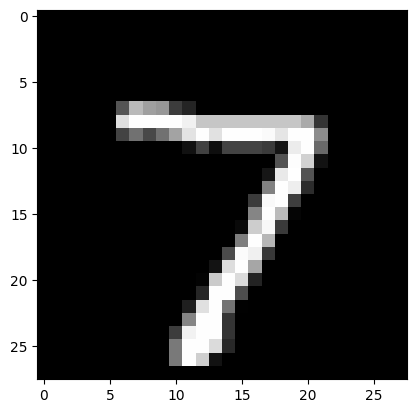

In [356]:
img, label = test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('shape',img.shape)
print('label:', label)

In [357]:
def predict_image(img,model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _,preds = torch.max(yb,dim=1)
    return preds[0].item()

Label: 7 ,Predicted: 7


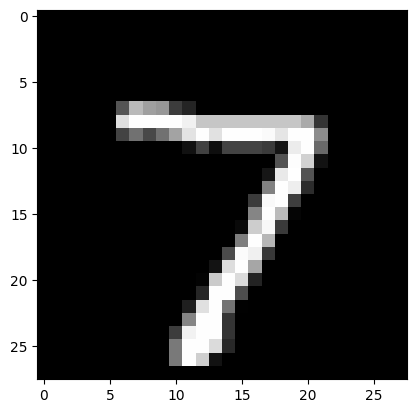

In [358]:
img,label = test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('Label:',label,',Predicted:',predict_image(img,model))

Label: 0 ,Predicted: 0


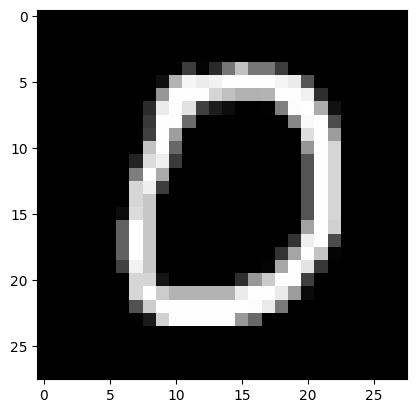

In [359]:
img,label = test_dataset[10]
plt.imshow(img[0],cmap='gray')
print('Label:',label,',Predicted:',predict_image(img,model))

Label: 9 ,Predicted: 3


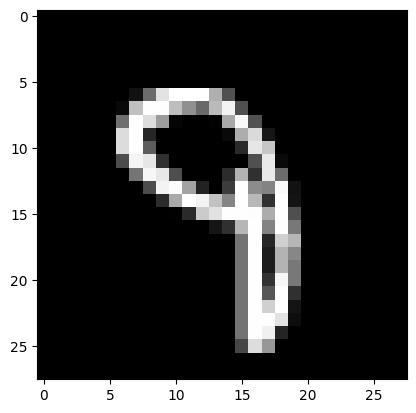

In [360]:
img,label = test_dataset[193]
plt.imshow(img[0],cmap='gray')
print('Label:',label,',Predicted:',predict_image(img,model))

Label: 2 ,Predicted: 8


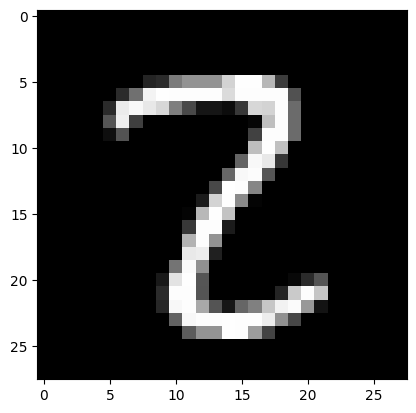

In [361]:
img,label = test_dataset[1839]
plt.imshow(img[0],cmap='gray')
print('Label:',label,',Predicted:',predict_image(img,model))

In [366]:
test_loader = DataLoader(test_dataset,batch_size=256)
result = evaluate(model,test_loader)
result 

{'val_loss': 0.6396661996841431, 'val_acc': 1.686914086341858}

# Saving and loading model

In [363]:
torch.save(model.state_dict(),'mnist-logistic.pth')

In [364]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0237, -0.0206, -0.0219,  ..., -0.0346, -0.0175, -0.0058],
                      [ 0.0063,  0.0135,  0.0259,  ...,  0.0188,  0.0309, -0.0168],
                      [ 0.0019, -0.0331, -0.0112,  ..., -0.0307, -0.0233, -0.0347],
                      ...,
                      [-0.0352,  0.0043,  0.0292,  ...,  0.0317, -0.0058, -0.0232],
                      [ 0.0265, -0.0002,  0.0084,  ..., -0.0334,  0.0317,  0.0189],
                      [-0.0285,  0.0278, -0.0253,  ...,  0.0340,  0.0228,  0.0061]])),
             ('linear.bias',
              tensor([-0.0577,  0.0880,  0.0117, -0.0174,  0.0174,  0.0449, -0.0336,  0.0569,
                      -0.0721, -0.0276]))])

In [365]:
mode12 = MnistModel()
mode12.load_state_dict(torch.load('mnist-logistic.pth'))


<All keys matched successfully>